In [ ]:

# install a library
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import yfinance as yf
import yfinance as yf # for financial data
import numpy as np # for scientific computing
import pandas as pd # for dealing with data frames
import seaborn as sns # for creating charts
import scipy.stats as scs # for technical computing (pronounced [saɪpa]) 
import statsmodels.api as sm # for providinga complement to scipy for statistical computations
import statsmodels.tsa.api as smt # for providinga complement to scipy for statistical computations
import matplotlib.pyplot as plt # for creating charts

In [ ]:
# load daily SPY data for all of 2022
spy_weekly = yf.download('SPY', start='2022-01-01', end='2023-04-08',interval='1wk').reset_index()
spy_daily = yf.download('SPY', start='2022-01-01', end='2023-04-08',interval='1d').reset_index()
spy_hourly = yf.download('SPY', start='2022-01-01', end='2023-04-08',interval='1h').reset_index()
spy_daily_test = yf.download('SPY', start='2023-04-09', end='2023-04-29',interval='1d').reset_index()


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [ ]:
#breakout datetime column to a Date and Hour
spy_hourly['Date'] = spy_hourly['Datetime'].dt.date
spy_hourly['Start_Time'] = spy_hourly['Datetime'].dt.time


In [ ]:
spy_weekly = spy_weekly[['Date', 'Open', 'High', 'Low', 'Adj Close', 'Volume' ]]
spy_daily = spy_daily[['Date', 'Open', 'High', 'Low', 'Adj Close', 'Volume' ]]
spy_hourly = spy_hourly[['Date', 'Open', 'High', 'Low', 'Adj Close', 'Volume', 'Start_Time']]
spy_daily_test = spy_daily_test[['Date', 'Open', 'High', 'Low', 'Adj Close', 'Volume' ]]


In [ ]:
#spy_hourly
spy_hourly.tail(10)


,Date,Open,High,Low,Adj Close,Volume,Start_Time
2203,2023-04-05,406.869995,407.682098,406.549988,407.089996,6702955,13:30:00
2204,2023-04-05,407.190186,407.769989,406.839996,407.209991,6493785,14:30:00
2205,2023-04-05,407.220001,407.859985,407.190002,407.649994,8770073,15:30:00
2206,2023-04-06,406.769989,407.260010,405.678009,406.839996,13020921,09:30:00
2207,2023-04-06,406.829987,407.350006,406.119995,407.160004,7550425,10:30:00
2208,2023-04-06,407.170013,408.635010,407.040009,408.464996,7950671,11:30:00
2209,2023-04-06,408.480011,409.200012,408.420013,408.999908,6151229,12:30:00
2210,2023-04-06,409.089996,409.379913,408.730011,409.279999,4751863,13:30:00
2211,2023-04-06,409.295013,409.480011,408.470001,408.888000,6507154,14:30:00
2212,2023-04-06,408.899994,409.260010,408.750000,409.200012,9993352,15:30:00


.

.

.

# **Exploratory Data Analysis (EDA's)**

## DESCRIPTIVE STATS

In [ ]:
#Descriptive stats and correlation coeffifcients for weekly
descriptive_weekly = spy_weekly.describe()
#corr_coeffs_w = spy_weekly.corr()

print(descriptive_weekly)
#print(corr_coeffs_w)

             Open        High         Low   Adj Close        Volume
count   66.000000   66.000000   66.000000   66.000000  6.600000e+01
mean   406.674091  415.135152  397.546212  401.697946  4.506371e+08
std     26.227065   25.761119   26.323041   24.025174  1.303502e+08
min    361.079987  370.260010  348.109985  354.195526  2.104792e+08
25%    388.877502  399.162506  380.567505  384.641617  3.625530e+08
50%    402.500000  409.850006  391.985001  400.916092  4.263864e+08
75%    422.975014  431.212509  411.067497  415.623245  5.292810e+08
max    476.299988  479.980011  464.649994  456.905426  9.205080e+08


In [ ]:
#Descriptive stats and correlation coeffifcients for daily
descriptive_daily = spy_daily.describe()
#corr_coeffs_d = spy_daily.corr()

print(descriptive_daily)
#print(corr_coeffs_d)

             Open        High         Low   Adj Close        Volume
count  317.000000  317.000000  317.000000  317.000000  3.170000e+02
mean   406.912460  410.344133  403.252776  402.225328  9.382350e+07
std     26.600321   26.381362   26.398350   24.619247  3.094839e+07
min    349.209991  359.820007  348.109985  353.580688  3.054540e+07
25%    388.380005  391.359985  385.260010  385.277618  7.327850e+07
50%    401.559998  404.100006  397.600006  397.632385  8.628980e+07
75%    423.670013  428.609985  419.209991  417.095642  1.081113e+08
max    479.220001  479.980011  475.579987  468.296417  2.517839e+08


In [ ]:
#Descriptive stats and correlation coeffifcients for hourly
descriptive_hourly = spy_hourly.describe()
#corr_coeffs_h = spy_hourly.corr()

print(descriptive_hourly)
#print(corr_coeffs_h)

              Open         High          Low    Adj Close        Volume
count  2213.000000  2213.000000  2213.000000  2213.000000  2.213000e+03
mean    406.888120   408.107429   405.613997   406.892795  1.187179e+07
std      26.450495    26.416920    26.452601    26.429227  6.529773e+06
min     349.204987   354.140900   348.109985   352.000000  0.000000e+00
25%     388.359985   389.549988   387.339996   388.429993  7.414411e+06
50%     400.759888   402.049988   399.410004   400.649994  1.020895e+07
75%     423.160004   424.670013   421.750000   423.010010  1.431216e+07
max     479.579987   479.980011   478.709991   479.589996  6.634379e+07


## PLOTS FOR **DAILY**

[Text(0.5, 1.0, 'Distribution of Daily Close Prices for SPY in 2022')]

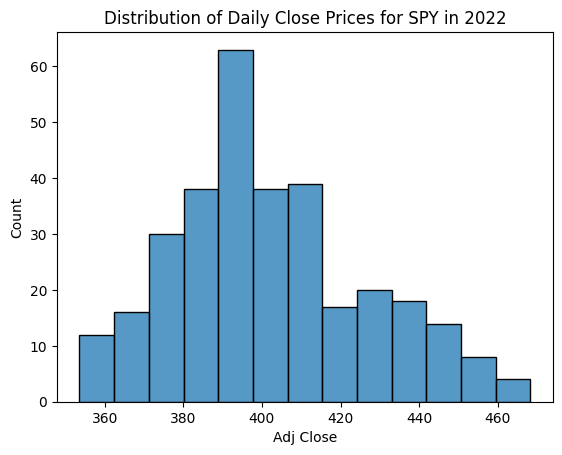

In [ ]:
# create a histogram for daily
sns.histplot(data=spy_daily, x='Adj Close').set(title='Distribution of Daily Close Prices for SPY in 2022')

[Text(0.5, 1.0, 'Distribution of Daily Close Prices for SPY in 2022')]

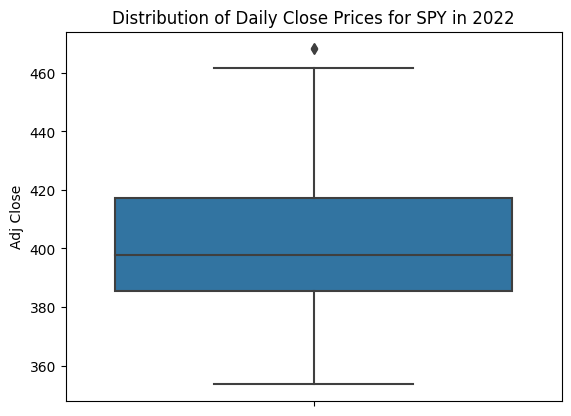

In [ ]:
# create a boxplot for daily
sns.boxplot(data=spy_daily, y='Adj Close').set(title='Distribution of Daily Close Prices for SPY in 2022')

[Text(0.5, 1.0, 'Daily Closing Prices vs. Volume for SPY in 2022')]

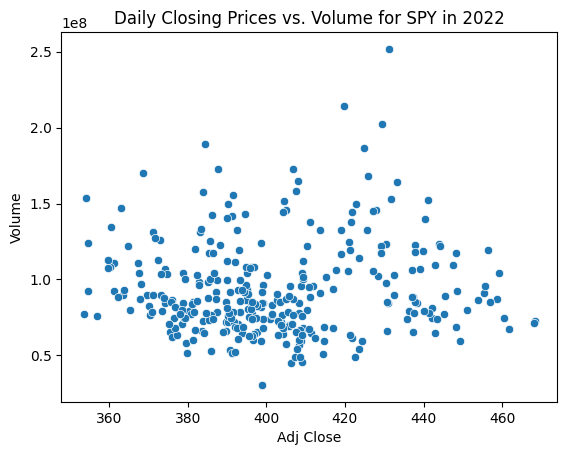

In [ ]:
# create a scatterplot for daily (adj close vs. volume)
sns.scatterplot(data=spy_daily, x='Adj Close', y='Volume').set(title='Daily Closing Prices vs. Volume for SPY in 2022')

## PLOTS FOR **WEEKLY**

[Text(0.5, 1.0, 'Distribution of Weekly Close Prices for SPY in 2022')]

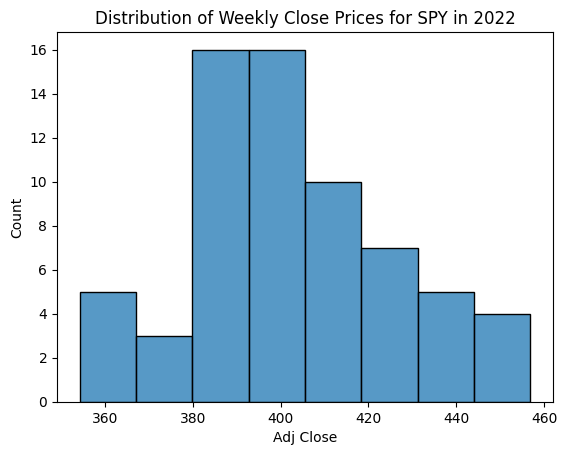

In [ ]:
# create a histogram for weekly
sns.histplot(data=spy_weekly, x='Adj Close').set(title='Distribution of Weekly Close Prices for SPY in 2022')

[Text(0.5, 1.0, 'Distribution of Weekly Close Prices for SPY in 2022')]

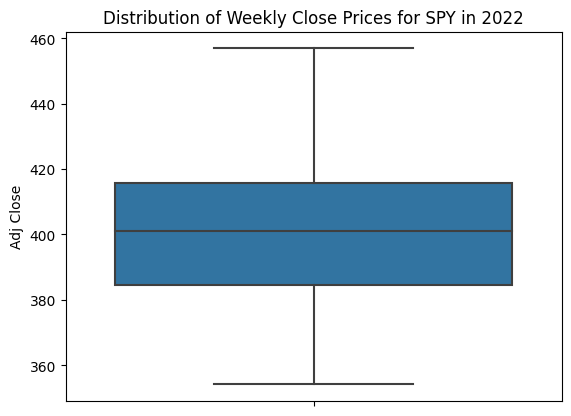

In [ ]:
# create a boxplot for weekly
sns.boxplot(data=spy_weekly, y='Adj Close').set(title='Distribution of Weekly Close Prices for SPY in 2022')

[Text(0.5, 1.0, 'Weekly Closing Prices vs. Volume for SPY in 2022')]

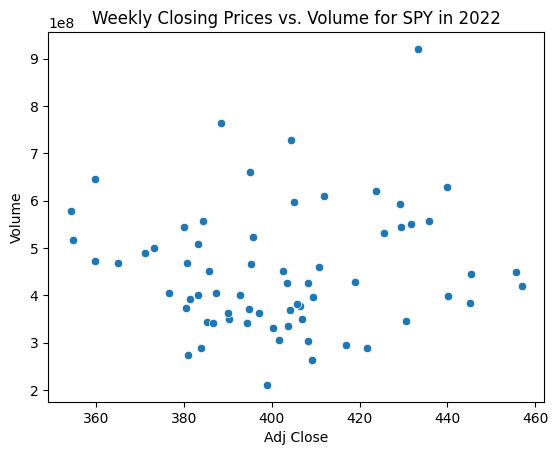

In [ ]:
# create a scatterplot for weekly (adj close vs. volume)
sns.scatterplot(data=spy_weekly, x='Adj Close', y='Volume').set(title='Weekly Closing Prices vs. Volume for SPY in 2022')

##PLOTS FOR **HOURLY**

[Text(0.5, 1.0, 'Distribution of Hourly Close Prices for SPY in 2022')]

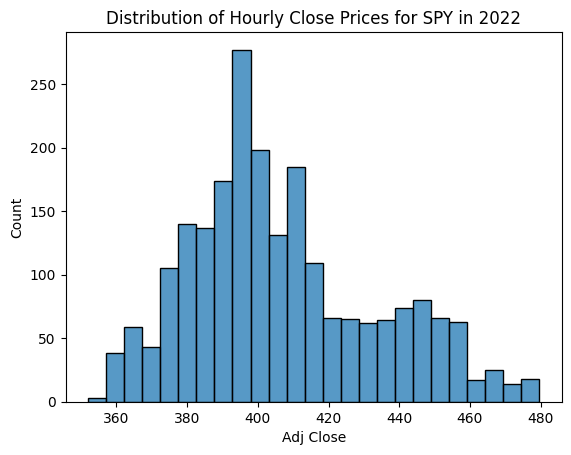

In [ ]:
# create a histogram for hourly
sns.histplot(data=spy_hourly, x='Adj Close').set(title='Distribution of Hourly Close Prices for SPY in 2022')

[Text(0.5, 1.0, 'Distribution of Hourly Close Prices for SPY in 2022')]

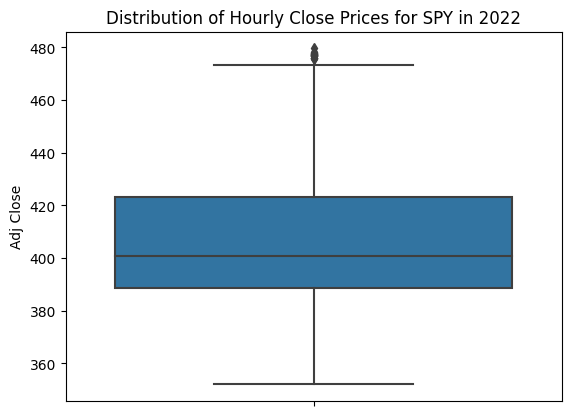

In [ ]:
# create a boxplot for hourly
sns.boxplot(data=spy_hourly, y='Adj Close').set(title='Distribution of Hourly Close Prices for SPY in 2022')

[Text(0.5, 1.0, 'Hourly Closing Prices vs. Volume for SPY in 2022')]

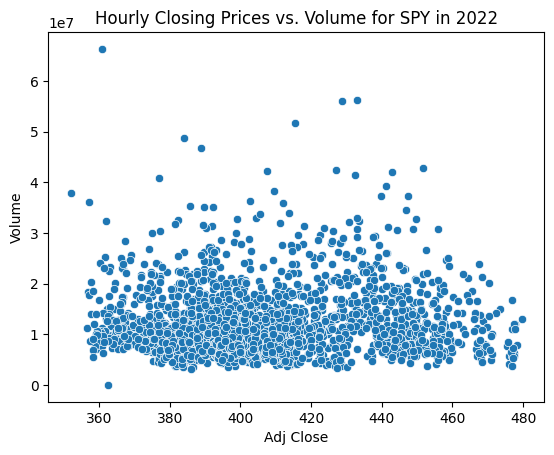

In [ ]:
# create a scatterplot for hourly (adj close vs. volume)
sns.scatterplot(data=spy_hourly, x='Adj Close', y='Volume').set(title='Hourly Closing Prices vs. Volume for SPY in 2022')

## **Outlier Detection**

Number of outliers: 2


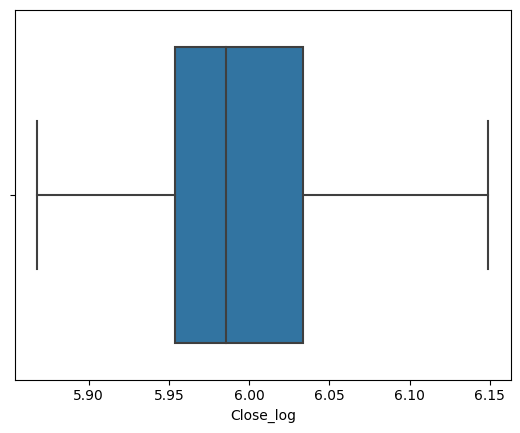

In [ ]:
#Daily Closing Price
#identify outliers
q1 = spy_daily['Adj Close'].quantile(0.25)
q3 = spy_daily['Adj Close'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5*iqr
upper_bound = q3 + 1.5*iqr
outliers = spy_daily[(spy_daily['Adj Close'] < lower_bound) | (spy_daily['Adj Close'] > upper_bound)]
print('Number of outliers:', len(outliers))

if(len(outliers)>=1):
  spy_daily['Close_log'] = np.log(spy_daily['Adj Close'])
  sns.boxplot(data=spy_daily, x='Close_log')
else: 
  print("There are no outliers")

Number of outliers: 11


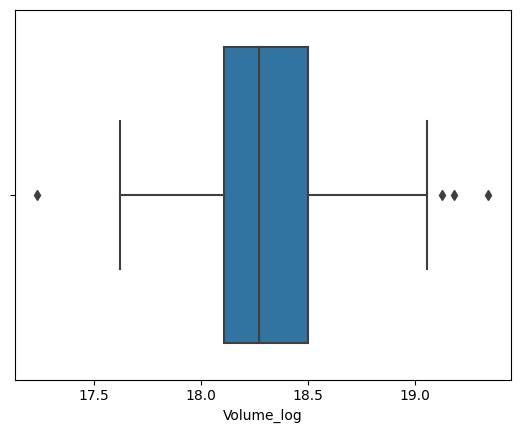

In [ ]:
#Daily Volume
# identify outliers
q1 = spy_daily['Volume'].quantile(0.25)
q3 = spy_daily['Volume'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5*iqr
upper_bound = q3 + 1.5*iqr
outliers = spy_daily[(spy_daily['Volume'] < lower_bound) | (spy_daily['Volume'] > upper_bound)]
print('Number of outliers:', len(outliers))

if(len(outliers)>=1):
  spy_daily['Volume_log'] = np.log(spy_daily['Volume'])
  sns.boxplot(data=spy_daily, x='Volume_log')
else: 
  print("There are no outliers")


In [ ]:
#Weekly Closing Price
#identify outliers
q1 = spy_weekly['Adj Close'].quantile(0.25)
q3 = spy_weekly['Adj Close'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5*iqr
upper_bound = q3 + 1.5*iqr
outliers = spy_weekly[(spy_weekly['Adj Close'] < lower_bound) | (spy_weekly['Adj Close'] > upper_bound)]
print('Number of outliers:', len(outliers))

if(len(outliers)>=1):
  spy_daily['Close_log'] = np.log(spy_daily['Adj Close'])
  sns.boxplot(data=spy_daily, x='Close_log')
else: 
  print("There are no outliers")

Number of outliers: 0
There are no outliers


Number of outliers: 1


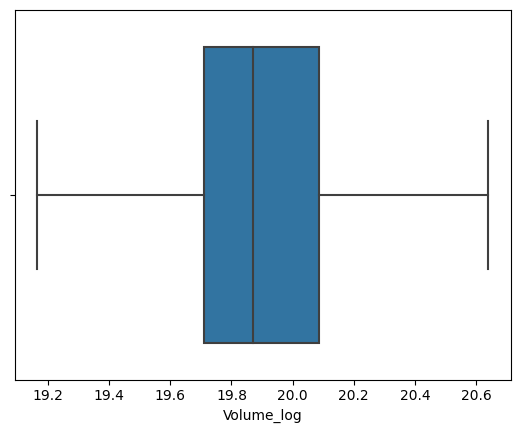

In [ ]:
#Weekly Volume
# identify outliers
q1 = spy_weekly['Volume'].quantile(0.25)
q3 = spy_weekly['Volume'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5*iqr
upper_bound = q3 + 1.5*iqr
outliers = spy_weekly[(spy_weekly['Volume'] < lower_bound) | (spy_weekly['Volume'] > upper_bound)]
print('Number of outliers:', len(outliers))

if(len(outliers)>=1):
  spy_weekly['Volume_log'] = np.log(spy_weekly['Volume'])
  sns.boxplot(data=spy_weekly, x='Volume_log')
else: 
  print("There are no outliers")


Number of outliers: 18


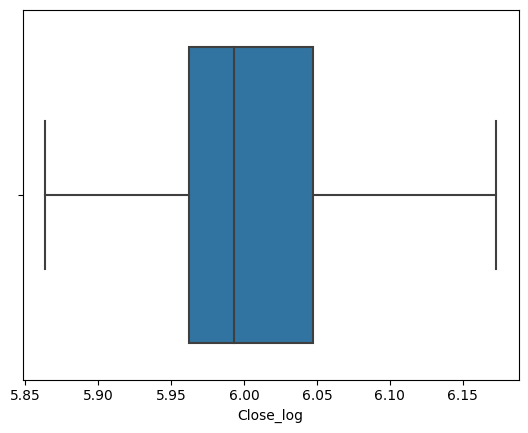

In [ ]:
# Hourly Closing Price
# identify outliers
q1 = spy_hourly['Adj Close'].quantile(0.25)
q3 = spy_hourly['Adj Close'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5*iqr
upper_bound = q3 + 1.5*iqr
outliers = spy_hourly[(spy_hourly['Adj Close'] < lower_bound) | (spy_hourly['Adj Close'] > upper_bound)]
print('Number of outliers:', len(outliers))

if(len(outliers)>=1):
  spy_hourly['Close_log'] = np.log(spy_hourly['Adj Close'])
  sns.boxplot(data=spy_hourly, x='Close_log')
else: 
  print("There are no outliers")


Number of outliers: 105


/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


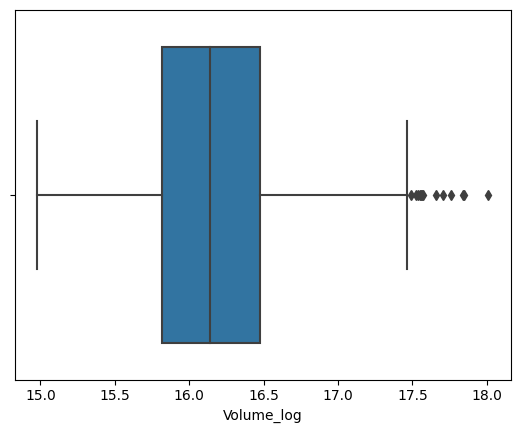

In [ ]:
# Hourly Volume
# identify outliers
q1 = spy_hourly['Volume'].quantile(0.25)
q3 = spy_hourly['Volume'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5*iqr
upper_bound = q3 + 1.5*iqr
outliers = spy_hourly[(spy_hourly['Volume'] < lower_bound) | (spy_hourly['Volume'] > upper_bound)]
print('Number of outliers:', len(outliers))

if(len(outliers)>=1):
  spy_hourly['Volume_log'] = np.log(spy_hourly['Volume'])
  sns.boxplot(data=spy_hourly, x='Volume_log')
else: 
  print("There are no outliers")


.

.

.

# PREPROCESSING

In [ ]:
#for implementing series_to_supervised() function
from pandas import DataFrame
from pandas import concat

# Get the Adjusted Close Price for weekly, daily, & hourly data
weekly_select = spy_weekly[['Adj Close']]
daily_select = spy_daily[['Adj Close']]
hourly_select = spy_hourly[['Adj Close']]

# converting the datasets to a numpy arrays
values_weekly = weekly_select.values
values_daily = daily_select.values
values_hourly = hourly_select.values

**STATIONARY & SEASONALITY**

In [ ]:
#Function to differentiate in order to achieve stationarity
def make_stationary(time_series, column_name, alpha=0.05):
    p_values = []
    for i in range(1, 10):
        test = sts.adfuller(time_series[column_name].diff(i).dropna())
        p_values.append((i, test[1]))
    significant = [p for p in p_values if p[1] < alpha]
    if len(significant) == 0:
        print("No differencing order achieves stationarity at the specified alpha level.")
        return None
    else:
        diff_order = sorted(significant)[0][0]
        stationary_series = time_series[column_name].diff(diff_order).dropna()
        return diff_order, stationary_series

In [ ]:
##Check for statiionarity - WEEKLY
import statsmodels.tsa.stattools as sts
sts.adfuller(spy_weekly['Adj Close'])

(-2.7864408441631956,
 0.06023685189857615,
 0,
 65,
 {'1%': -3.5352168748293127,
  '5%': -2.9071540828402367,
  '10%': -2.5911025443786984},
 416.33473815962685)

Explain stationary and seasonality - Weeekly

The output shows:

*   Test statistic: -2.7864
*   p-value: 0.0602
*   Number of lags used: 0
*   Number of observations used for the ADF regression and calculation of the critical values: 65
*   Critical values at the 1%, 5%, and 10% levels: -3.5352, -2.9072, and -2.5911, respectively
*   Maximum information criterion (used to select the number of lags in the ADF regression): 416.3347


In order to test for stationarity, we must compare the p-value to critical value. The p-value is greater than the significance at 0.05, so we cannot assume stationarity.

(-8.295045713047388,
 4.161901338719485e-13,
 0,
 64,
 {'1%': -3.53692771987915,
  '5%': -2.907887369384766,
  '10%': -2.591493291015625},
 418.11161720153814)

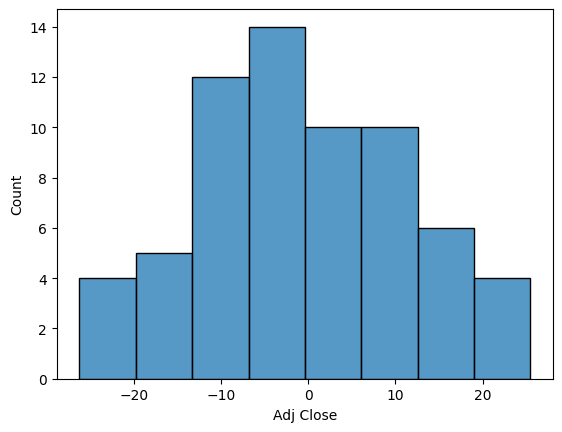

In [ ]:
#Differentiated WEEKLY
#sts.adfuller(spy_weekly['Adj Close'].diff(2).dropna())
diff_order, stationary_weekly = make_stationary(spy_weekly, 'Adj Close')

sns.histplot(data=stationary_weekly)

sts.adfuller(stationary_weekly)

After differentiation, the p-value is now less than the significance level of 0.05, indicating stationarity.

In [ ]:
##Check for statiionarity - DAILY
sts.adfuller(spy_daily['Adj Close'])
#NOT SURE IF U WANT THE HISTO FOR THIS AGAIN TO SHOW TREND BUT SHES COMMENTED BELOW
#sns.histplot(data=spy_daily, x='Adj Close').set(title='Distribution of Daily Close Prices for SPY in 2022')

(-2.9657119755634316,
 0.038222922431110175,
 0,
 316,
 {'1%': -3.4512146067362317,
  '5%': -2.870730188960711,
  '10%': -2.5716664849383113},
 1897.9402628447535)

Explain stationary and seasonality - Daily

The output shows:

*   Test statistic: -2.9657
*   p-value: 0.0382
*   Number of lags used: 0
*   Number of observations used for the ADF regression and calculation of the critical values: 316
*   Critical values at the 1%, 5%, and 10% levels: -3.4512, -2.8707, and -2.5717, respectively
*   Maximum information criterion (used to select the number of lags in the ADF regression): 1897.9403


In order to test for stationarity, we must compare the p-value to critical value. The p-value is less than the significance at 0.05, so we can assume stationarity.

In [ ]:
#Check for statiionarity - HOURLY
sts.adfuller(spy_hourly['Adj Close'])

(-2.81484851277879,
 0.05618386713778683,
 0,
 2212,
 {'1%': -3.4333097218995423,
  '5%': -2.862847514596788,
  '10%': -2.5674660532963385},
 9495.910866375416)

Explain stationary and seasonality - Hourly

The output shows:

*   Test statistic: -2.8159
*   p-value: 0.0560
*   Number of lags used: 0
*   Number of observations used for the ADF regression and calculation of the critical values: 2214
*   Critical values at the 1%, 5%, and 10% levels: -3.4333, -2.8628, and -2.5675, respectively
*   Maximum information criterion (used to select the number of lags in the ADF regression): 9501.7758


In order to test for stationarity, we must compare the p-value to critical value. The p-value is greater than the significance at 0.05, so we fail to assume stationarity.

(-46.6828504788312,
 0.0,
 0,
 2211,
 {'1%': -3.433311062093479,
  '5%': -2.8628481063596647,
  '10%': -2.5674663683699017},
 9499.632273522302)

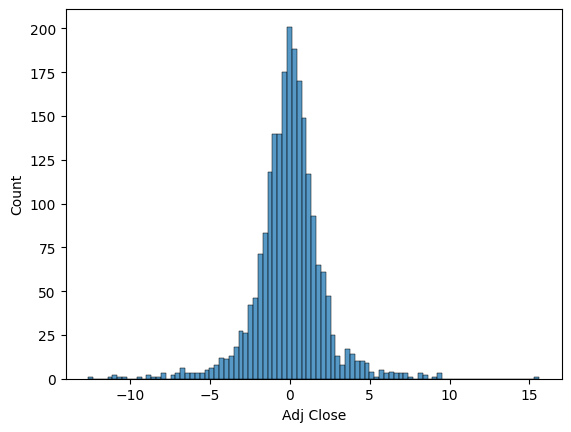

In [ ]:
#Differentiated HOURLY
diff_order, stationary_hourly = make_stationary(spy_hourly, 'Adj Close')

sns.histplot(data=stationary_hourly)
sts.adfuller(stationary_hourly)

After differentiation, the p-value is now less than the significance level of 0.05, indicating stationarity.

**SERIES TO SUPERVISED**

We can define a function named series_to_supervised() that will take in a univariate or multivariate time series and frame it as a supervised learning dataset.

In [ ]:
#series_to_supervised
def series_to_supervised(data, n_in=10, n_out=1, dropnan=True):
    """
    Frame a time series as a supervised learning dataset .
    Arguments :
     data : Sequence of observations as a list or NumPy array .
     n_in : Number of lag observations as input (X).
     n_out : Number of observations as output (y).
     dropnan : Boolean whether or not to drop rows with NaN values .
    Returns :
     Pandas DataFrame of series framed for supervised learning .
    """ 
    n_vars = 1 if type(data) is list else data.shape[1]
    df = DataFrame(data)
    cols, names = list(), list()
    
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var %d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars )]
    # put it all together
    agg = concat(cols, axis =1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace = True)
    return agg

Below are the supervised learning datasets for the last 10 weeks, days, and hours of the SPY 500 in 2022

In [ ]:



#implementing series_to_supervised to weekly data
spy_weekly_sts = series_to_supervised(values_weekly, 10)
print("Weekly data as a supervised learning dataset:")
print(spy_weekly_sts)
print(" ")

#implementing series_to_supervised to daily data
spy_daily_sts = series_to_supervised(values_daily, 10)
print("Daily data as a supervised learning dataset:")
print(spy_daily_sts)
print(" ")

#implementing series_to_supervised to hourly data
spy_hourly_sts = series_to_supervised(values_hourly, 10)
print("Hourly data as a supervised learning dataset:")
print(spy_hourly_sts)


Weekly data as a supervised learning dataset:
    var 1(t-10)  var 1(t-9)  var 1(t-8)  var 1(t-7)  var 1(t-6)  var 1(t-5)  \
10   456.905426  455.562439  429.349335  433.241119  439.858124  431.780457   
11   455.562439  429.349335  433.241119  439.858124  431.780457  425.673248   
12   429.349335  433.241119  439.858124  431.780457  425.673248  429.123871   
13   433.241119  439.858124  431.780457  425.673248  429.123871  423.653809   
14   439.858124  431.780457  425.673248  429.123871  423.653809  411.792267   
15   431.780457  425.673248  429.123871  423.653809  411.792267  435.760437   
16   425.673248  429.123871  423.653809  411.792267  435.760437  445.148071   
17   429.123871  423.653809  411.792267  435.760437  445.148071  445.374268   
18   423.653809  411.792267  435.760437  445.148071  445.374268  440.113403   
19   411.792267  435.760437  445.148071  445.374268  440.113403  430.496307   
20   435.760437  445.148071  445.374268  440.113403  430.496307  418.942078   
21   4

.

.

.

# **MODELS**

**Model 1 (Baseline Model): Support Vector Machines (SVM)**

In [ ]:
# Brendan Abbott
# Model 2: Support Vector Machines/SVM
# Import necessary packages to the jupyter notebook
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split





#SPY WEEKLY SVM
####################
##################
################
##############
############
##########
########
######
####
##
#



# scaling Weekly data with StandardScaler()
mm_scaler_weekly = StandardScaler().fit_transform(spy_weekly_sts)
print("Weekly data Scaled: ")

# linear regression coefficients using Normal Equation Method

# Weekly
# splitting data into a matrix X and a vector Y
X_weekly = mm_scaler_weekly[:,0:10]
Y_weekly = mm_scaler_weekly[:,10]

# Add bias vector of ones as the first column
X_weekly = np.column_stack((np.ones(X_weekly.shape[0]), X_weekly))

# splitting data into training and test sets
X_train_weekly, X_test_weekly, Y_train_weekly, Y_test_weekly = train_test_split(X_weekly, Y_weekly, test_size=0.3, random_state=1)

# Train the SVM model
svr = SVR(kernel='linear')
svr.fit(X_train_weekly, Y_train_weekly)

# Test the SVM model
y_pred = svr.predict(X_test_weekly)
mse = mean_squared_error(Y_test_weekly, y_pred)
r2 = r2_score(Y_test_weekly, y_pred)
print('Results for SPY Weekly')
print("Mean squared error for: %.2f" % mse)
print("Coefficient of determination (R2 score): %.2f" % r2)
print("")


##########################


#SPY DAILY SVM
####################
##################
################
##############
############
##########
########
######
####
##
#


# scaling Weekly data with StandardScaler()
mm_scaler_daily = StandardScaler().fit_transform(spy_daily_sts)
print("Weekly data Scaled: ")

# linear regression coefficients using Normal Equation Method

# Weekly
# splitting data into a matrix X and a vector Y
X_daily = mm_scaler_daily[:,0:10]
Y_daily = mm_scaler_daily[:,10]

# Add bias vector of ones as the first column
X_daily = np.column_stack((np.ones(X_daily.shape[0]), X_daily))

# splitting data into training and test sets
X_train_daily, X_test_daily, Y_train_daily, Y_test_daily = train_test_split(X_daily, Y_daily, test_size=0.3, random_state=1)

# Train the SVM model
svr = SVR(kernel='linear')
svr.fit(X_train_daily, Y_train_daily)

# Test the SVM model
y_pred = svr.predict(X_test_daily)
mse = mean_squared_error(Y_test_daily, y_pred)
r2 = r2_score(Y_test_daily, y_pred)
print('Results for SPY Daily')
print("Mean squared error for: %.2f" % mse)
print("Coefficient of determination (R2 score): %.2f" % r2)
print("")



#SPY HOURLY SVM
####################
##################
################
##############
############
##########
########
######
####
##
#


# scaling Weekly data with StandardScaler()
mm_scaler_hourly = StandardScaler().fit_transform(spy_hourly_sts)
print("Weekly data Scaled: ")

# linear regression coefficients using Normal Equation Method

# Weekly
# splitting data into a matrix X and a vector Y
X_hourly = mm_scaler_hourly[:,0:10]
Y_hourly = mm_scaler_hourly[:,10]

# Add bias vector of ones as the first column
X_hourly = np.column_stack((np.ones(X_hourly.shape[0]), X_hourly))

# splitting data into training and test sets
X_train_hourly, X_test_hourly, Y_train_hourly, Y_test_hourly = train_test_split(X_hourly, Y_hourly, test_size=0.3, random_state=1)

# Train the SVM model
svr = SVR(kernel='linear')
svr.fit(X_train_hourly, Y_train_hourly)

# Test the SVM model
y_pred = svr.predict(X_test_hourly)
mse = mean_squared_error(Y_test_hourly, y_pred)
r2 = r2_score(Y_test_hourly, y_pred)
print('Results for SPY Hourly')
print("Mean squared error for: %.2f" % mse)
print("Coefficient of determination (R2 score): %.2f" % r2)
print("")



Weekly data Scaled: 
Results for SPY Weekly
Mean squared error for: 0.41
Coefficient of determination (R2 score): 0.55

Weekly data Scaled: 
Results for SPY Daily
Mean squared error for: 0.06
Coefficient of determination (R2 score): 0.94

Weekly data Scaled: 
Results for SPY Hourly
Mean squared error for: 0.01
Coefficient of determination (R2 score): 0.99



For our base model support vector machine. Our goal is to determine what the adjusted close price will be based on our inputs of "Open", "High", "Low", and "Volume". As we can see from the results, our mean squared error significantly decreases between Weekly, Daily, and Hourly. It actually improves the less time between adjusted closed. We believe this is due to the high randomness and volatility that is present within market conditions from day to day, and week to week.

.

**Model 2: Gradient Descent Method**

In [ ]:
# Brendan Abbott
# Baseline Model: Gradient Descent Method


# Import necessary packages to the jupyter notebook
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split



#implementing series_to_supervised to weekly data
spy_weekly_sts = series_to_supervised(values_weekly, 10)
# print("Weekly data as a supervised learning dataset:")
# print(spy_weekly_sts)
# print(" ")

#SPY WEEKLY GRADIENT DESCENT LINEAR REGRESSION
####################
##################
################
##############
############
##########
########
######
####
##
#




def predict(X, coef):
    """Return the predicted target variable given input features and coefficients."""
    return np.dot(X, coef)

def coefficients_sgd(X, y, learning_rate=0.01, n_epochs=1000):
    """Return the coefficients for linear regression using the gradient descent algorithm."""
    # Add bias column to input data
    X = np.insert(X, 0, 1, axis=1)
    # Initialize coefficients to zero
    coef = np.zeros(X.shape[1])
    # Loop over epochs
    for epoch in range(n_epochs):
        # Loop over training examples
        for i in range(X.shape[0]):
            # Compute predicted target variable
            y_pred = predict(X[i], coef)
            # Compute error between predicted and actual target variable
            error = y_pred - y[i]
            # Update bias term
            coef[0] -= learning_rate * error
            # Update remaining coefficients
            coef[1:] -= learning_rate * error * X[i][1:]
    return coef[1:], coef[0]


mm_scaler_weekly = StandardScaler().fit_transform(spy_weekly_sts)
print("Weekly data Scaled: ")

#splitting data into a matrix X and a vector Y
X_weekly = mm_scaler_weekly[:,0:10]
Y_weekly = mm_scaler_weekly[:,10]

# Add bias vector of ones as the first column
X_weekly = np.column_stack((np.ones(X_weekly.shape[0]), X_weekly))

# #drop the bias column from the X matrix
X_weekly = list(map(lambda x: x[1:], X_weekly))
X_weekly = np.asarray(X_weekly)


# remove the bias column from X_weekly
X_weekly = X_weekly[:, 1:]

X_train_weekly, X_test_weekly, Y_train_weekly, Y_test_weekly = train_test_split(X_weekly, Y_weekly, test_size=0.3, random_state=1)


# Example usage:
# Assume we have training data X_train and y_train
coef, bias = coefficients_sgd(X_train_weekly, Y_train_weekly)
y_pred = predict(X_test_weekly, coef)
mse = mean_squared_error(Y_test_weekly, y_pred)
r2 = r2_score(Y_test_weekly, y_pred)



print('Coefficient Predictions')
print(y_pred)
print('')
print('Mean Squared Error:')
print(mse)
print('')
print('R2 Score')
print(r2)
print('')


#SPY DAILY GRADIENT DESCENT LINEAR REGRESSION
####################
##################
################
##############
############
##########
########
######
####
##
#


def predict(X, coef):
    """Return the predicted target variable given input features and coefficients."""
    return np.dot(X, coef)

def coefficients_sgd(X, y, learning_rate=0.01, n_epochs=1000):
    """Return the coefficients for linear regression using the gradient descent algorithm."""
    # Add bias column to input data
    X = np.insert(X, 0, 1, axis=1)
    # Initialize coefficients to zero
    coef = np.zeros(X.shape[1])
    # Loop over epochs
    for epoch in range(n_epochs):
        # Loop over training examples
        for i in range(X.shape[0]):
            # Compute predicted target variable
            y_pred = predict(X[i], coef)
            # Compute error between predicted and actual target variable
            error = y_pred - y[i]
            # Update bias term
            coef[0] -= learning_rate * error
            # Update remaining coefficients
            coef[1:] -= learning_rate * error * X[i][1:]
    return coef[1:], coef[0]


mm_scaler_daily = StandardScaler().fit_transform(spy_daily_sts)
print("Daily data Scaled: ")

#splitting data into a matrix X and a vector Y
X_daily = mm_scaler_daily[:,0:10]
Y_daily = mm_scaler_daily[:,10]

# Add bias vector of ones as the first column
X_daily = np.column_stack((np.ones(X_daily.shape[0]), X_daily))

# #drop the bias column from the X matrix
X_daily = list(map(lambda x: x[1:], X_daily))
X_daily = np.asarray(X_daily)


# remove the bias column from X_daily
X_daily = X_daily[:, 1:]

X_train_daily, X_test_daily, Y_train_daily, Y_test_daily = train_test_split(X_daily, Y_daily, test_size=0.3, random_state=1)


# Example usage:
# Assume we have training data X_train and y_train
coef, bias = coefficients_sgd(X_train_daily, Y_train_daily)
y_pred = predict(X_test_daily, coef)
mse = mean_squared_error(Y_test_daily, y_pred)
r2 = r2_score(Y_test_daily, y_pred)



print('Coefficient Predictions')
print(y_pred)
print('')
print('Mean Squared Error:')
print(mse)
print('')
print('R2 Score')
print(r2)
print('')


#SPY HOURLY GRADIENT DESCENT LINEAR REGRESSION
####################
##################
################
##############
############
##########
########
######
####
##
#


def predict(X, coef):
    """Return the predicted target variable given input features and coefficients."""
    return np.dot(X, coef)

def coefficients_sgd(X, y, learning_rate=0.01, n_epochs=1000):
    """Return the coefficients for linear regression using the gradient descent algorithm."""
    # Add bias column to input data
    X = np.insert(X, 0, 1, axis=1)
    # Initialize coefficients to zero
    coef = np.zeros(X.shape[1])
    # Loop over epochs
    for epoch in range(n_epochs):
        # Loop over training examples
        for i in range(X.shape[0]):
            # Compute predicted target variable
            y_pred = predict(X[i], coef)
            # Compute error between predicted and actual target variable
            error = y_pred - y[i]
            # Update bias term
            coef[0] -= learning_rate * error
            # Update remaining coefficients
            coef[1:] -= learning_rate * error * X[i][1:]
    return coef[1:], coef[0]


mm_scaler_hourly = StandardScaler().fit_transform(spy_hourly_sts)
print("Hourly data Scaled: ")

#splitting data into a matrix X and a vector Y
X_hourly = mm_scaler_hourly[:,0:10]
Y_hourly = mm_scaler_hourly[:,10]

# Add bias vector of ones as the first column
X_hourly = np.column_stack((np.ones(X_hourly.shape[0]), X_hourly))

# #drop the bias column from the X matrix
X_hourly = list(map(lambda x: x[1:], X_hourly))
X_hourly = np.asarray(X_hourly)


# remove the bias column from X_daily
X_hourly = X_hourly[:, 1:]

X_train_hourly, X_test_hourly, Y_train_hourly, Y_test_hourly = train_test_split(X_hourly, Y_hourly, test_size=0.3, random_state=1)


# Example usage:
# Assume we have training data X_train and y_train
coef, bias = coefficients_sgd(X_train_hourly, Y_train_hourly)
y_pred = predict(X_test_hourly, coef)
mse = mean_squared_error(Y_test_hourly, y_pred)
r2 = r2_score(Y_test_hourly, y_pred)



print('Coefficient Predictions')
print(y_pred)
print('')
print('Mean Squared Error:')
print(mse)
print('')
print('R2 Score')
print(r2)
print('')

Weekly data Scaled: 
Coefficient Predictions
[ 0.07494541  1.59235758  0.57547131 -0.72440672 -0.74530576 -0.52034532
  0.27423585 -0.60958991  0.66595432 -1.07211211  0.31718553  0.91227195
  1.11192721 -0.18102416 -0.86036964  1.75541015 -0.06166851]

Mean Squared Error:
0.4965022235362249

R2 Score
0.45683208293699673

Daily data Scaled: 
Coefficient Predictions
[-0.57858558  1.50346932  0.17472032  0.31334949 -1.63028938  1.15485276
  0.31471002 -0.874198   -0.23136407  0.47055888  0.49045939 -1.43653966
  0.25395765 -0.81888958 -0.16331303 -0.44485431 -0.7020784  -0.68588968
 -0.01775213  1.55420284 -0.3623193   1.75170797 -1.08416919 -1.30351129
  0.85494766  2.02778254 -1.78826485 -0.52423768 -1.40380675  1.92379163
 -1.09902973  0.61511832 -0.2960129   1.04947533 -0.4693373  -1.69982791
  0.38370051  0.1148815  -0.12108281  0.42695748 -0.27996943 -1.91050892
  0.07193256 -0.4123062  -0.74678487 -0.83706513 -0.29141753  0.20333957
  0.960475    0.40954468 -0.476697    0.22582598

We used the gradient descent because this model iterativley updates the parameters based on a learning rate. As we see in the accuracy of our models, our weekly and daily are essentially random. Only when we move towards hourly do we see an increase in accuracy significantly above random.

.

**Model 3: RandomForestRegressor**

In [ ]:
# Brandon Diaz-Lopez
# Model 3: Random Forrest Regressor

# Import necessary packages to the jupyter notebook
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
import numpy as np
import matplotlib.pyplot as plt

#for implementing series_to_supervised() function
from pandas import DataFrame
from pandas import concat

# Get the Adjusted Close Price for weekly, daily, & hourly data
weekly_select4 = spy_weekly_sts[['var1(t)']]
daily_select4 = spy_daily_sts[['var1(t)']]
hourly_select4 = spy_hourly_sts[['var1(t)']]

# converting the datasets to a numpy arrays
values_weekly4 = weekly_select4.values
values_daily4 = daily_select4.values
values_hourly4 = hourly_select4.values

Weekly RMSE: 0.17087327361882848
Weekly R^2: -0.03312350174940337


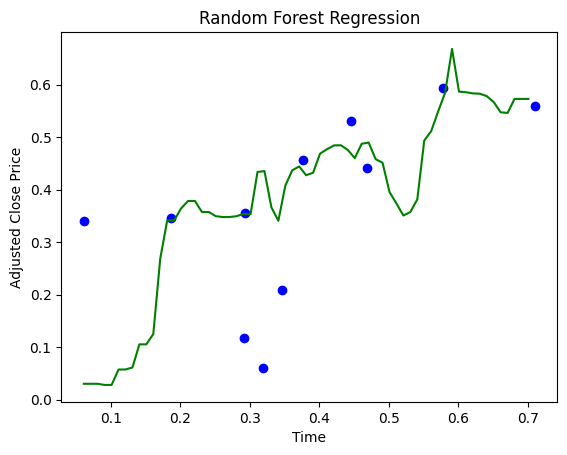

In [ ]:
#weekly dataset

#First we need to scale the data
weeklyscaler = MinMaxScaler(feature_range=(0, 1))
weekly_scaled_values = weeklyscaler.fit_transform(values_weekly4)

#Then we split the data into training and testing datasets
weeklyX_train, weeklyX_test, weeklyy_train, weeklyy_test = train_test_split(weekly_scaled_values[:-1], weekly_scaled_values[1:], test_size=0.2, random_state=42)


# Adding the Ravel() function to convert the 1d array to a 2d one
weeklyy_train = weeklyy_train.ravel()
weeklyy_test = weeklyy_test.ravel()

#Now we must create the instance for the RandomForrestRegressor  
#side note, we are using the regressor vs the classifer because the regressor works better with numeric or continuous outputs that cannot be defined by classes
weeklyrf_model = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)

weeklyrf_model.fit(weeklyX_train, weeklyy_train)

weeklyy_pred = weeklyrf_model.predict(weeklyX_test)

# Calculating the weekly RMSE and R^2 scores
weeklyrmse = np.sqrt(mean_squared_error(weeklyy_test, weeklyy_pred))
weeklyr2 = r2_score(weeklyy_test, weeklyy_pred)

print('Weekly RMSE:', weeklyrmse)
print('Weekly R^2:', weeklyr2)

# arrange for creating a range of values
# from the min value of weeklyX_test to max value of weeklyX_test
# with a difference of 0.01 between two consecutive values
weeklyX_grid = np.arange(min(weeklyX_test), max(weeklyX_test), 0.01)

# reshape the data into a len(weeklyX_grid)*1 array
weeklyX_grid = weeklyX_grid.reshape((len(weeklyX_grid), 1))

# Scatter plot for original data
plt.scatter(weeklyX_test, weeklyy_test, color='blue')

# Plot predicted data
plt.plot(weeklyX_grid, weeklyrf_model.predict(weeklyX_grid), color='green')

plt.title('Random Forest Regression')
plt.xlabel('Time')
plt.ylabel('Adjusted Close Price')
plt.show()


Daily RMSE: 0.05676115015844162
Daily R^2: 0.9331531725828374


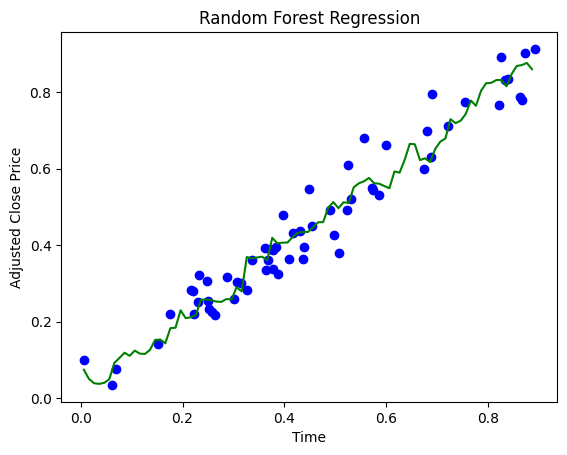

In [ ]:
#daily dataset

#First we need to scale the data 
dailyscaler = MinMaxScaler(feature_range=(0, 1))
daily_scaled_values = dailyscaler.fit_transform(values_daily4)

#Then we split the data into training and testing datasets
dailyX_train, dailyX_test, dailyy_train, dailyy_test = train_test_split(daily_scaled_values[:-1], daily_scaled_values[1:], test_size=0.2, random_state=42)


# Adding the Ravel() function to convert the 1d array to a 2d one
dailyy_train = dailyy_train.ravel()
dailyy_test = dailyy_test.ravel()

#Now we must create the instance for the RandomForrestRegressor  
#side note, we are using the regressor vs the classifer because the regressor works better with numeric or continuous outputs that cannot be defined by classes
dailyrf_model = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)

dailyrf_model.fit(dailyX_train, dailyy_train)

dailyy_pred = dailyrf_model.predict(dailyX_test)

# Calculating the daily RMSE and R^2 scores
dailyrmse = np.sqrt(mean_squared_error(dailyy_test, dailyy_pred))
dailyr2 = r2_score(dailyy_test, dailyy_pred)

print('Daily RMSE:', dailyrmse)
print('Daily R^2:', dailyr2)

# arrange for creating a range of values
# from the min value of dailyX_test to max value of dailyX_test
# with a difference of 0.01 between two consecutive values
dailyX_grid = np.arange(min(dailyX_test), max(dailyX_test), 0.01)

# reshape the data into a len(dailyX_grid)*1 array
dailyX_grid = dailyX_grid.reshape((len(dailyX_grid), 1))

# Scatter plot for original data
plt.scatter(dailyX_test, dailyy_test, color='blue')

# Plot predicted data
plt.plot(dailyX_grid, dailyrf_model.predict(dailyX_grid), color='green')

plt.title('Random Forest Regression')
plt.xlabel('Time')
plt.ylabel('Adjusted Close Price')
plt.show()

Hourly RMSE: 0.01677302761736689
Hourly R^2: 0.9931940085990595


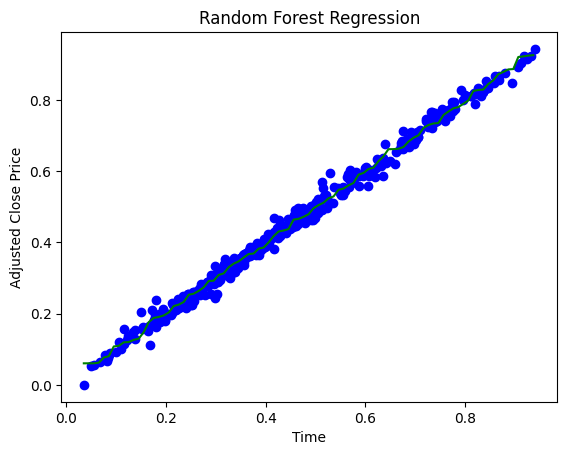

In [ ]:
#hourly dataset

#First we need to scale the data 
hourlyscaler = MinMaxScaler(feature_range=(0, 1))
hourly_scaled_values = hourlyscaler.fit_transform(values_hourly4)

#Then we split the data into training and testing datasets
hourlyX_train, hourlyX_test, hourlyy_train, hourlyy_test = train_test_split(hourly_scaled_values[:-1], hourly_scaled_values[1:], test_size=0.2, random_state=42)


# Adding the Ravel() function to convert the 1d array to a 2d one
hourlyy_train = hourlyy_train.ravel()
hourlyy_test = hourlyy_test.ravel()

#Now we must create the instance for the RandomForrestRegressor  
#side note, we are using the regressor vs the classifer because the regressor works better with numeric or continuous outputs that cannot be defined by classes
hourlyrf_model = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)

hourlyrf_model.fit(hourlyX_train, hourlyy_train)

hourlyy_pred = hourlyrf_model.predict(hourlyX_test)

# Calculating the hourly RMSE and R^2 scores
hourlyrmse = np.sqrt(mean_squared_error(hourlyy_test, hourlyy_pred))
hourlyr2 = r2_score(hourlyy_test, hourlyy_pred)

print('Hourly RMSE:', hourlyrmse)
print('Hourly R^2:', hourlyr2)

# arrange for creating a range of values
# from the min value of hourlyX_test to max value of hourlyX_test
# with a difference of 0.01 between two consecutive values
hourlyX_grid = np.arange(min(hourlyX_test), max(hourlyX_test), 0.01)

# reshape the data into a len(hourlyX_grid)*1 array
hourlyX_grid = hourlyX_grid.reshape((len(hourlyX_grid), 1))

# Scatter plot for original data
plt.scatter(hourlyX_test, hourlyy_test, color='blue')

# Plot predicted data
plt.plot(hourlyX_grid, hourlyrf_model.predict(hourlyX_grid), color='green')

plt.title('Random Forest Regression')
plt.xlabel('Time')
plt.ylabel('Adjusted Close Price')
plt.show()

Another model that we decided to use is the Random Forrest Regressor model. The reason why we have to use the regressor model instead of the Random Forrest Classifer is because our data is numerical and it does not have a class. The reason we usaed MinMaxScaler is because it avoids any bias towards larger value which then ensures that our model will learn some meaningful patterns. 

Another change that we used in these models were the function "ravel()". The reason we had to use this function is because we were converting it from a 2-dimensional array to a 1-dimensional array.

The results for this model were intially very successful. These were the following results: 

WEEKLY
1. Weekly RMSE: 0.17087326684380122
2. Weekly R^2: -0.03312247762987219

DAILY
1. Daily RMSE: 0.05676113362267673
2. Daily R^2: 0.9331531575988805

HOURLY
1. Hourly RMSE: 0.01677302761736689
2. Hourly R^2: 0.9931940085990595

All of the models performed extremely well, however, the hourly model was almost perfect. With an R^2 close to 1 and a low RMSE, it has the highest chaance to be accurate when predicting this model. I believe this has to do with the amount of trades that occur hourly. Further research needs to be made to determine why hourly is performing much better than weekly. 

One of the ways that we will explore making this model more accurate is by using the AdaboostRegressor function. This will help boost our models accuracy. Another way is to mess with the initial parameters such as the number os estimators, the max depth, and the random state. I believe that all of these will help improve our models predictions. 

.

**Model 4: Normal Equation Method**

For this portion, we will attempt to predict the closing price of the SPY 500. Our preliminary model will be based on last 10 weeks, 10 days, and 10 hours of closing prices.

In [ ]:
# Maria Greenfield
# Model 4: Normal Equation Method

# Import necessary packages to the jupyter notebook
# Implement a Linear Regression model using Normal Equation Method
from sklearn . preprocessing import MinMaxScaler
from sklearn . model_selection import train_test_split
from sklearn . metrics import mean_squared_error
from sklearn . metrics import r2_score
from sklearn . metrics import accuracy_score

We will then scale the data using the MinMaxScaler() function. This is an important preprocessing step, as it allows us to scale and translate each figure individually such that it is in the given range on the training set.

In [ ]:
# converting Weekly data to numpy array first
spy_weekly_sts = spy_weekly_sts.to_numpy()
# scaling Weekly data with MinMaxScaler()
mm_scaler_weekly = MinMaxScaler().fit_transform(spy_weekly_sts)
print("Weekly data Scaled: ")
print(mm_scaler_weekly)
print(" ")

# converting Daily data to numpy array first
spy_daily_sts = spy_daily_sts.to_numpy()
# scaling Daily data with MinMaxScaler()
mm_scaler_daily = MinMaxScaler().fit_transform(spy_daily_sts)
print("Daily data Scaled: ")
print(mm_scaler_daily)
print(" ")

# converting Hourly data to numpy array first
spy_hourly_sts = spy_hourly_sts.to_numpy()
# scaling Hourly data with MinMaxScaler()
mm_scaler_hourly = MinMaxScaler().fit_transform(spy_hourly_sts)
print("Hourly data Scaled: ")
print(mm_scaler_hourly)

Weekly data Scaled: 
[[1.         1.         0.82424705 0.86693008 0.93950187 0.8509103
  0.78392969 0.82177428 0.76178154 0.63169046 0.89456061]
 [0.98692446 0.74140374 0.86693008 0.93950187 0.8509103  0.78392969
  0.82177428 0.76178154 0.63169046 0.89456061 0.9975192 ]
 [0.73170949 0.77979679 0.93950187 0.8509103  0.78392969 0.82177428
  0.76178154 0.63169046 0.89456061 0.9975192  1.        ]
 [0.76960053 0.84507454 0.8509103  0.78392969 0.82177428 0.76178154
  0.63169046 0.89456061 0.9975192  1.         0.94230164]
 [0.83402474 0.76538713 0.78392969 0.82177428 0.76178154 0.63169046
  0.89456061 0.9975192  1.         0.94230164 0.83682644]
 [0.75537928 0.70513859 0.82177428 0.76178154 0.63169046 0.89456061
  0.9975192  1.         0.94230164 0.83682644 0.71010578]
 [0.69591853 0.73917951 0.76178154 0.63169046 0.89456061 0.9975192
  1.         0.94230164 0.83682644 0.71010578 0.55868791]
 [0.72951434 0.68521651 0.63169046 0.89456061 0.9975192  1.
  0.94230164 0.83682644 0.71010578 0.55

The bias vector of ones added onto to the X matrix is a constant which is added to the product of features and weights. It is used to offset the result and helps the models to shift the activation function towards the positive or negative side.

For the preliminary model, we have decided to split our data into 70% training data and 30% test data and have set the 'random_state'=1.

The Normal Equation Method is a closed-form solution used to find the value of theta that minimized the cost function. It is a one-step algorithm used to analytically find the coefficients that minimize the loss funciton.

In [ ]:
# linear regression coefficients using Normal Equation Method

# Weekly
#splitting data into a matrix X and a vector Y
X_weekly = mm_scaler_weekly[:,0:10]
Y_weekly = mm_scaler_weekly[:,10]

# Add bias vector of ones as the first column
X_weekly = np.column_stack((np.ones(X_weekly.shape[0]), X_weekly))

#splitting data into training and test sets
X_train_weekly, X_test_weekly, Y_train_weekly, Y_test_weekly = train_test_split(X_weekly, Y_weekly, test_size=0.3, random_state=1)

#calculation for Normal Equation Method
theta_weekly = np.dot(np.linalg.inv(np.dot(X_weekly.T,X_weekly)),np.dot(X_weekly.T,Y_weekly))
print("Theta for weekly data: ")
print(theta_weekly)
print(" ")


# Daily
#splitting data into a matrix X and a vector Y
X_daily = mm_scaler_daily[:,0:10]
Y_daily = mm_scaler_daily[:,10]

# Add bias vector of ones as the first column
X_daily = np.column_stack((np.ones(X_daily.shape[0]), X_daily))

#splitting data into training and test sets
X_train_daily, X_test_daily, Y_train_daily, Y_test_daily = train_test_split(X_daily, Y_daily, test_size=0.3, random_state=1)

#calculation for Normal Equation Method
theta_daily = np.dot(np.linalg.inv(np.dot(X_daily.T,X_daily)),np.dot(X_daily.T,Y_daily))
print("Theta for daily data: ")
print(theta_daily)
print(" ")


# Hourly
#splitting data into a matrix X and a vector Y
X_hourly = mm_scaler_hourly[:,0:10]
Y_hourly = mm_scaler_hourly[:,10]

# Add bias vector of ones as the first column
X_hourly = np.column_stack((np.ones(X_hourly.shape[0]), X_hourly))

#splitting data into training and test sets
X_train_hourly, X_test_hourly, Y_train_hourly, Y_test_hourly = train_test_split(X_hourly, Y_hourly, test_size=0.3, random_state=1)

#calculation for Normal Equation Method
theta_hourly = np.dot(np.linalg.inv(np.dot(X_hourly.T,X_hourly)),np.dot(X_hourly.T,Y_hourly))
print("Theta for hourly data: ")
print(theta_hourly)

Theta for weekly data: 
[ 0.06888983  0.04308448  0.28545438 -0.23956278  0.07117055 -0.00632137
 -0.18904112  0.08036617 -0.0139368   0.01683058  0.82390254]
 
Theta for daily data: 
[ 0.01813304 -0.09630024  0.12038432 -0.06554874  0.09574075 -0.07884306
  0.02110135  0.01755208  0.03084763 -0.06817477  1.00153811]
 
Theta for hourly data: 
[ 0.00199623 -0.04013526  0.04507841 -0.05083688  0.07262085 -0.06716697
  0.03685673 -0.0017368   0.03008148 -0.03582011  1.00618624]


The prediction values are found by by calculating the dot product of the weight vector theta and the matrix X. The mean squared error (MSE) measure the amount of error in statistical methods by assessing the average squared difference between the observed and predicted values. The coefficient of determination R^2 indicated how much variation of a dependent variable (Y_pred) is explained by the indepenent variable (X) in a regression model. An R^2 value closer to 1 indicates smaller differences between the observed data and the fitted values.

In [ ]:
# make a prediction using linear regression function

# Weekly
print("Weekly predictions and performance")
#prediction vector for Normal Equation Method
Y_pred_weekly = X_test_weekly.dot(theta_weekly)
print('Prediction vector: ', Y_pred_weekly)

#MSE calculation
mse_weekly = mean_squared_error(Y_test_weekly, Y_pred_weekly)
print("Mean Squared Error: ", mse_weekly)

#R^2 calculation
r2_weekly = r2_score(Y_test_weekly, Y_pred_weekly)
print("R^2: ", r2_weekly)
print(" ")


# Daily
print("Daily predictions and performance")
#prediction vector for Normal Equation Method
Y_pred_daily = X_test_daily.dot(theta_daily)
print('Prediction vector: ', Y_pred_daily)

#MSE calculation
mse_daily = mean_squared_error(Y_test_daily, Y_pred_daily)
print("Mean Squared Error: ", mse_daily)

#R^2 calculation
r2_daily = r2_score(Y_test_daily, Y_pred_daily)
print("R^2: ", r2_daily)
print(" ")


# Hourly
print("Hourly predictions and performance")
#prediction vector for Normal Equation Method
Y_pred_hourly = X_test_hourly.dot(theta_hourly)
print('Prediction vector: ', Y_pred_hourly)

#MSE calculation
mse_hourly = mean_squared_error(Y_test_hourly, Y_pred_hourly)
print("Mean Squared Error: ", mse_hourly)

#R^2 calculation
r2_hourly = r2_score(Y_test_hourly, Y_pred_hourly)
print("R^2: ", r2_hourly)

Weekly predictions and performance
Prediction vector:  [0.47187138 0.88752927 0.5759922  0.40659204 0.30332911 0.37049759
 0.45985764 0.32594937 0.53569686 0.22732927 0.52583893 0.63472179
 0.53913731 0.34055029 0.35348744 0.92501197 0.44091821]
Mean Squared Error:  0.011811281828779425
R^2:  0.7462756625454338
 
Daily predictions and performance
Prediction vector:  [0.32607687 0.84695206 0.56152514 0.53446195 0.08324477 0.76760795
 0.51560198 0.2199481  0.43456742 0.56315176 0.55897139 0.11677071
 0.52116143 0.24697185 0.42660452 0.36282962 0.32522738 0.30682159
 0.44709261 0.85649253 0.36595759 0.87949458 0.20737854 0.16254315
 0.65946619 0.95678366 0.02357798 0.34253113 0.11349708 0.91347657
 0.20024503 0.6498906  0.38531008 0.72676859 0.36970131 0.07921948
 0.54522577 0.5322111  0.42137239 0.54995273 0.4044927  0.01592438
 0.47221057 0.37172172 0.29040511 0.24950577 0.41246097 0.49709153
 0.74442223 0.55640898 0.31861592 0.54928615 0.34705067 0.77985112
 0.39325179 0.86310919 0.362

Weekly: The model for the weekly data yielded an MSE of 0.0118 and an R^2 value of 0.7463.

Daily: The model for the daily data yielded an MSE of 0.0027 and an R^2 value of 0.9458.

Hourly: The model for the hourly data yielded an MSE of 0.0003 and an R^2 value of 0.9923.

.

.

.

# Final Model Implementation

In [ ]:
spy_daily_test

,Date,Open,High,Low,Adj Close,Volume
0,2023-04-10,406.609985,409.690002,405.970001,409.609985,63681000
1,2023-04-11,410.260010,411.179993,408.920013,409.720001,59297900
2,2023-04-12,411.869995,412.170013,407.440002,408.049988,86420400
3,2023-04-13,409.179993,413.839996,407.989990,413.470001,85814800
4,2023-04-14,412.809998,415.089996,410.059998,412.459991,78129500
5,2023-04-17,412.369995,413.959991,411.089996,413.940002,66436400
6,2023-04-18,415.579987,415.720001,412.779999,414.209991,63560000
7,2023-04-19,412.220001,415.079987,412.160004,414.140015,55227300
8,2023-04-20,411.209991,413.700012,410.269989,411.880005,75840400
9,2023-04-21,412.190002,412.679993,410.170013,412.200012,73436100


In [ ]:
#implementing series_to_supervised to daily data


daily_select = spy_daily_test[['Adj Close']]

values_daily_test = daily_select.values


spy_daily_sts_predict = series_to_supervised(values_daily_test)
print("Daily data as a supervised learning dataset:")
print(spy_daily_sts_predict)
print(" ")

Daily data as a supervised learning dataset:
    var 1(t-10)  var 1(t-9)  var 1(t-8)  var 1(t-7)  var 1(t-6)  var 1(t-5)  \
10   409.609985  409.720001  408.049988  413.470001  412.459991  413.940002   
11   409.720001  408.049988  413.470001  412.459991  413.940002  414.209991   
12   408.049988  413.470001  412.459991  413.940002  414.209991  414.140015   
13   413.470001  412.459991  413.940002  414.209991  414.140015  411.880005   
14   412.459991  413.940002  414.209991  414.140015  411.880005  412.200012   

    var 1(t-4)  var 1(t-3)  var 1(t-2)  var 1(t-1)     var1(t)  
10  414.209991  414.140015  411.880005  412.200012  412.630005  
11  414.140015  411.880005  412.200012  412.630005  406.079987  
12  411.880005  412.200012  412.630005  406.079987  404.359985  
13  412.200012  412.630005  406.079987  404.359985  412.410004  
14  412.630005  406.079987  404.359985  412.410004  415.929993  
 


In [ ]:
mm_scaler_daily_test = StandardScaler().fit_transform(spy_daily_sts_predict)


In [ ]:
# implement the data on the final model to current 'test' data
# Final Model: Normal Euqation Method - Linear Regression
# Dataset: Daily


# Add bias vector of ones as the first column
X_daily_predict = np.column_stack((np.ones(mm_scaler_daily_test.shape[0]), mm_scaler_daily_test))


#calculation for Normal Equation Method
theta_daily = np.dot(np.linalg.inv(np.dot(X_daily_predict.T,X_daily_predict)),np.dot(X_daily_predict.T,X_daily_predict))

# Daily
print("Hourly predictions and performance")
#prediction vector for Normal Equation Method
Y_pred_daily = X_daily_predict.dot(theta_daily)
print('Prediction vector: ', Y_pred_daily)

# #MSE calculation
# mse_hourly = mean_squared_error(Y_test_hourly, Y_pred_hourly)
# print("Mean Squared Error: ", mse_hourly)

# #R^2 calculation
# r2_hourly = r2_score(Y_test_hourly, Y_pred_hourly)
# print("R^2: ", r2_hourly)

Hourly predictions and performance
Prediction vector:  [[ 1.          0.89060728  0.01511773 -2.35436901 -2.39554831 -1.00814643
  -0.18311605  0.71516311  0.54062315 -0.11359241 -1.09720502  0.90506976]
 [ 1.          1.8275107  -2.16795401 -0.56477548 -3.74161769  0.17759594
  -0.66018658  1.21811146  0.66254216 -0.86788214 -0.50009391  1.0413191 ]
 [ 1.         -0.95277436  2.9334557   2.1649999   4.17184188  2.06561208
   1.63968441 -1.13362021  0.02937808 -0.40210528  0.2143093  -1.01966014]
 [ 1.          0.66171183 -0.20805408  1.50039041  1.2912968   0.59747313
  -2.051774    0.61713967 -0.10159776  0.54031594 -0.44392189  0.26691496]
 [ 1.         -2.42705545 -0.57256533 -0.74624582  0.67402732 -1.83253473
   1.25539222 -1.41679403 -1.13094563  0.84326389  1.82691151 -1.19364369]]
